# Свойства оценок

## Задача 1
Сгенерируйте выборку $X_1, ..., X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4.$
Для всех $n\leq N$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X},$ $\overline{X} + X_{(n)}/2,$ $(n + 1)X_{(1)},$ $X_{(1)} + X_{(n)},$ $\frac{n+1}{n}X_{(n)}.$ Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n.$ Если
некоторые оценки (при фиксированном значении $n$) сильно отличаются от истинного значения параметра $\theta,$ то исключите их и постройте еще один график со всеми кривыми (для измененного значения $\theta$). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки можно соединить линиями. Такая оценка получилась лучше (в смысле упомянутого модуля разности при $n = N$)? Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$).

Для начала сгенерируем выборку равномерного распределения.

In [418]:
from scipy.stats import uniform

import numpy as np
import matplotlib.pyplot as plt

theta = 1000000
N = 10**4

selection = uniform.rvs(loc=0, scale=theta, size=N)

Построим для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n.$

In [419]:
ns = np.arange(1, N + 1)

def mean(x):
    return np.abs(theta - 2 * (selection.cumsum() / x))

def meanplusmaxdiv2(x):
    return [np.abs(theta - (selection[:int(i)].mean() + selection[:int(i)].max() / 2)) for i in x]

def nplus1mulmin(x):
    return [np.abs(theta - ((i + 1) * selection[:int(i)].min())) for i in x]

def minplusmax(x):
    return [np.abs(theta - (selection[:int(i)].min() + selection[:int(i)].max())) for i in x]

def ndivnplus1mulmax(x):
    return [np.abs(theta - ((i + 1) / i) * selection[:int(i)].max()) for i in x]

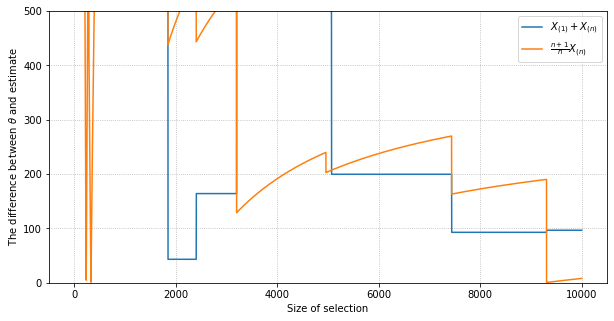

In [420]:
plt.figure(figsize=(10, 5))

plt.plot(ns, minplusmax(ns), label='$X_{(1)} + X_{(n)}$')
plt.plot(ns, ndivnplus1mulmax(ns), label='$\\frac{n+1}{n}X_{(n)}$')

plt.ylim((0, 500)) 

plt.legend()
plt.xlabel('Size of selection')
plt.ylabel('The difference between $\\theta$ and estimate')

plt.grid(ls=':')
plt.show()

Рассмотрим поведение всех оценок при маленьком $\theta = 100$ в сравнении с размером выборки.

In [433]:
theta = 10
selection = uniform.rvs(loc=0, scale=theta, size=N)

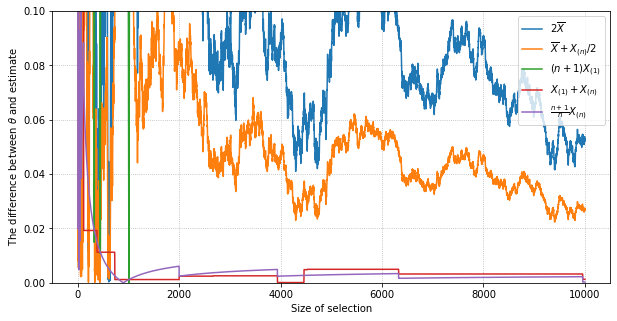

In [434]:
plt.figure(figsize=(10, 5))

plt.plot(ns, mean(ns), label='$2\overline{X}$')
plt.plot(ns, meanplusmaxdiv2(ns), label='$\overline{X} + X_{(n)}/2$')
plt.plot(ns, nplus1mulmin(ns), label='$(n + 1)X_{(1)}$')
plt.plot(ns, minplusmax(ns), label='$X_{(1)} + X_{(n)}$')
plt.plot(ns, ndivnplus1mulmax(ns), label='$\\frac{n+1}{n}X_{(n)}$')

plt.ylim((0, 0.1)) 

plt.legend()
plt.xlabel('Size of selection')
plt.ylabel('The difference between $\\theta$ and estimate')

plt.grid(ls=':')
plt.show()

Рассмотрим поведение всех оценок при сильно большом $\theta = 10^{100}$ в сравнении с размером выборки.

In [437]:
theta = 10 ** 20
selection = uniform.rvs(loc=0, scale=theta, size=N)

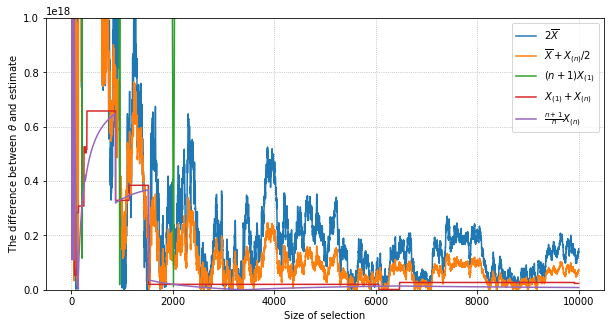

In [438]:
plt.figure(figsize=(10, 5))

plt.plot(ns, mean(ns), label='$2\overline{X}$')
plt.plot(ns, meanplusmaxdiv2(ns), label='$\overline{X} + X_{(n)}/2$')
plt.plot(ns, nplus1mulmin(ns), label='$(n + 1)X_{(1)}$')
plt.plot(ns, minplusmax(ns), label='$X_{(1)} + X_{(n)}$')
plt.plot(ns, ndivnplus1mulmax(ns), label='$\\frac{n+1}{n}X_{(n)}$')

plt.ylim((0, 10**18)) 

plt.legend()
plt.xlabel('Size of selection')
plt.ylabel('The difference between $\\theta$ and estimate')

plt.grid(ls=':')
plt.show()

Можно увидеть, что оценки $X_{(1)} + X_{(n)},$ $\frac{n+1}{n}X_{(n)}$ заметно лучше других в смысле модуля разности, причём значение оценок довольно быстро(уже на маленьком размере выборки) позволяет оценить значение параметра $\theta$. В то время как оценки $2\overline{X},$ $\overline{X} + X_{(n)}/2,$ тоже неплохо оценивают параметр. А оставшаяся оценка $(n + 1)X_{(1)}$ плохо. Причём все оценки себя ведут примерно одинаково на разного порядка значениях параметра. Заметим, что все оценки являются несмещенными оценками. Также все оценки кроме $(n + 1)X_{(1)}$ являются сильно состоятельными. Данные графики показывают, что несмещенность достаточно слабое свойство для оценки.

# Задача 2
Сгенерируйте выборку $X_1, ..., X_N$ из экспоненциально\-го
распределения с параметром $\theta = 1$ для $N = 10^4.$ Для всех
$n\leq N$ посчитайте оценку $(k!/\overline{X^k})^{1/k}$ параметра
$\theta.$ Проведите исследование, аналогичное предыдущей задаче, и
выясните, при каком $k$ оценка ведет себя лучше (рассмотрите не
менее 10 различных значений $k$).


In [498]:
from scipy.stats import expon
from scipy.stats import moment

theta = 1
N = 10**4

selection = expon.rvs(loc=0, scale=theta, size=N)

Посчитаем нашу оценку при различных параметрах $k$.

In [499]:
def estimate(k):
    data = []
    for i in range(1, N + 1):
        data.append(np.abs(theta - np.power(np.math.factorial(k) / (selection[:i] ** k).mean(), 1/k)))
    return data

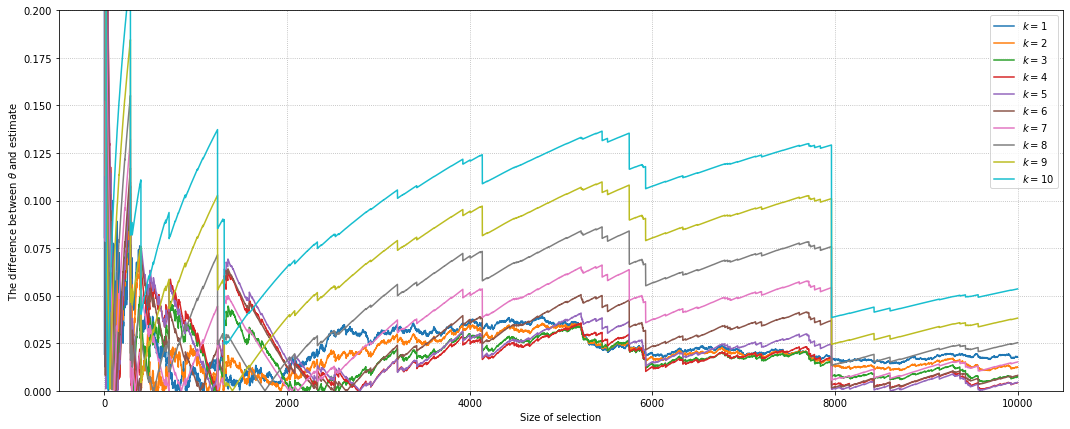

In [500]:
plt.figure(figsize=(18, 7))
plt.ylim((0, 0.2)) 

ns = np.arange(1, N + 1)
for i in range(1, 11):
    plt.plot(ns, estimate(i), label='$k = {}$'.format(i))

plt.legend()
plt.grid(ls=':')
plt.xlabel('Size of selection')
plt.ylabel('The difference between $\\theta$ and estimate')

plt.show()

Заметим, что при $k = 1$ достигается достаточно быстро хорошая оценка параметра. Как мы знаем: данная оценка является ассимптотичекой нормальной при любых значениях $k$, причем при меньших значениях $k$ достигается меньшая ассимптотическая дисперсия, что и подтверждается нашим графиком.

# Задача 3

Придумайте распределение, у которого конечны первые
четыре момента, а пятый -- нет. Сгенерируйте выборку $X_1, ..., X_N$
из этого распределения для $N = 10^4.$ Постройте график плотности,
а также нанесите точки выборки на график (с нулевой
$y$-координатой). Для всех $n\leq N$ посчитайте оценку $s^2 =
s^2(X_1, ..., X_N)$ для дисперсии. Постройте график зависимости
модуля разности оценки дисперсии и ее истинного значения от $n.$
Проведите аналогичное исследование для выборки из распределения
Коши, где вместо графика модуля разности оценки дисперсии и ее
истинного значения (которого не существует) постройте график оценки
дисперсии.

Как нам известно $\int_{1}^{\infty}{\frac{1}{x^6}} = 0.2$, а $\int_{1}^{\infty}{\frac{1}{x}}$ не сходится, тогда для нашей задачей очевидно хочется взять такую плотность распределения. Спустя некоторое время использования Google можно обнаружить, что это распределение Парето.

In [469]:
from scipy.stats import pareto
pareto_dis = pareto(5)

Сгенерируем выборку из этого распредения размера $N = 10^4$.

In [470]:
N = 10**4
selection = pareto_dis.rvs(size=N)

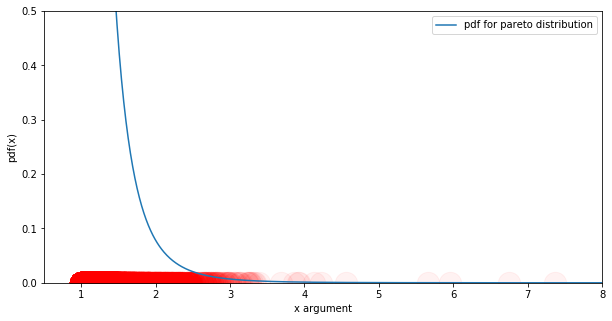

In [471]:
x_p = np.linspace(1, 11, 10 ** 3)

plt.figure(figsize=(10, 5))
plt.ylim((0, 0.5)) 
plt.xlim((0.5, 8)) 
plt.plot(x_p, pareto_dis.pdf(x_p), label='pdf for pareto distribution')
plt.scatter(selection, [0] * len(selection), color="red", alpha=0.05, s=500)
plt.xlabel('x argument')
plt.ylabel('pdf(x)')
plt.legend()

plt.show()

Как можно заметить, что в тех местах, где значение плотности распределения больше, то количество точек больше, что согласно теории. Построим теперь модуль разности между оценкой дисперсии и дисперсией распределения.

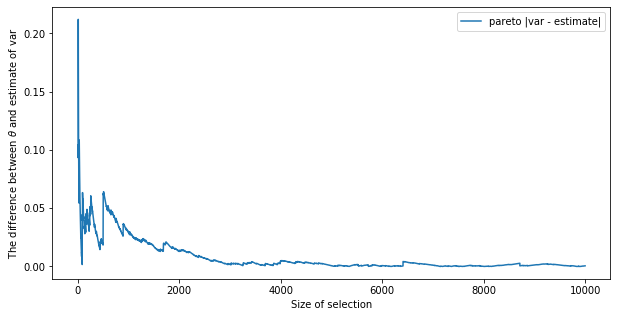

In [475]:
x_p = np.arange(1, N + 1)
y_p = []

for i in range(1, N + 1):
    y_p += [np.divide(sum((selection[:i] - selection[:i].mean()) ** 2), i)]

theta = pareto_dis.var()
y_p = np.abs(y_p - theta)
    
plt.figure(figsize=(10, 5))
plt.plot(x_p, y_p, label='pareto |var - estimate|')
plt.xlabel('Size of selection')
plt.ylabel('The difference between $\\theta$ and estimate of var')
plt.legend()

plt.show()

Как видно на графике выше эмпирическая дисперсия нашего распределения сходится довольно быстро к реальному значению дисперсии. Что на самом деле тривиальным образом следует из ЗБЧ.

Проведем теперь аналогичное исследование для распределения Коши.

In [464]:
from scipy.stats import cauchy
cauchy_dis = cauchy()

Сгенерируем выборку из этого распредения размера $N = 10^4$.

In [485]:
N = 10**4
selection = cauchy_dis.rvs(size=N)

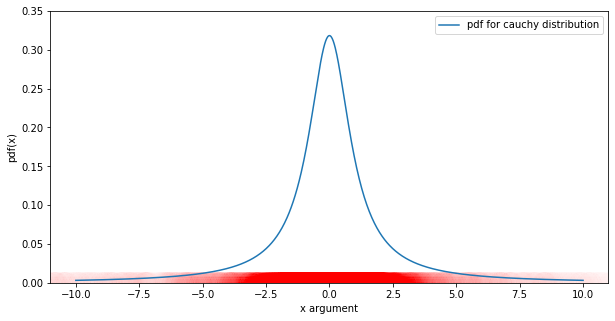

In [486]:
x_p = np.linspace(-10, 10, 10 ** 3)

plt.figure(figsize=(10, 5))
plt.ylim((0, 0.35)) 
plt.xlim((-11, 11)) 
plt.plot(x_p, cauchy_dis.pdf(x_p), label='pdf for cauchy distribution')
plt.scatter(selection, [0] * len(selection), color="red", alpha=0.002, s=500)
plt.xlabel('x argument')
plt.ylabel('pdf(x)')
plt.legend()

plt.show()

Здесь делается аналогичный вывод про плотность относительно предыдущего утверждения. Так же исследуем оценку дисперсии.

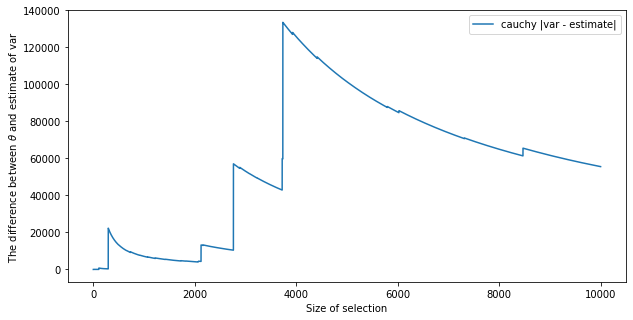

In [487]:
x_p, y_p = [], []

for i in range(1, N):
    x_p += [i]
    y_p += [np.divide(sum((selection[:i] - selection[:i].mean()) ** 2), i)]
    
plt.figure(figsize=(10, 5))
plt.plot(x_p, y_p, label='cauchy |var - estimate|')
plt.xlabel('Size of selection')
plt.ylabel('The difference between $\\theta$ and estimate of var')
plt.legend()

plt.show()

Как можно заметить, что эмпирическая дисперсия над выборкой распределения Коши не сходится по графику. Что и логично ввиду отсутствия дисперсии у распределения Коши.

# Задача 4

Сгенерируйте выборку $X_1, ..., X_N$ из стандартного нормального распределения для
$N = 10^4.$ Для всех $n\leq N$ посчитайте по ней эмпирическую
функцию распределения. Для некоторых $n$ (например, $n \in \{10, 25,
50, 100, 1000, N\}$) постройте графики эмпи\-рической функции
распределения (отметьте на оси абсцисс точки скачков' кривых,
нанеся каждую из 'подвыборок' на ось абсцисс на каждом
соответствующем графике с коэффициентом прозрачности 0.2), нанеся на
каждый из них истинную функцию распределения (количество графиков
равно количеству различныз значений $n$). Для всех $n \leq N$
посчитайте точное значение $D_n = \sup_{x\in\mathbb{R}}
|\hat{F}_n(x) - F(x)|$ и постройте график зависимости статистик
$D_n$ и $\sqrt{n}D_n$ от $n.$


Возьмём нормальное распределение.

In [387]:
from scipy.stats import norm
rv = norm()

Сгенерируем выборку из этого распредения размера $N = 10^4$.

In [488]:
N = 10**4
selection = norm.rvs(size=N)

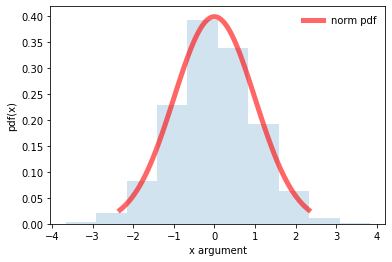

In [490]:
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
plt.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.hist(selection, density=True, histtype='stepfilled', alpha=0.2)
plt.xlabel('x argument')
plt.ylabel('pdf(x)')
plt.legend(loc='best', frameon=False)
plt.show()

Построим эмперическую функцию распределения.

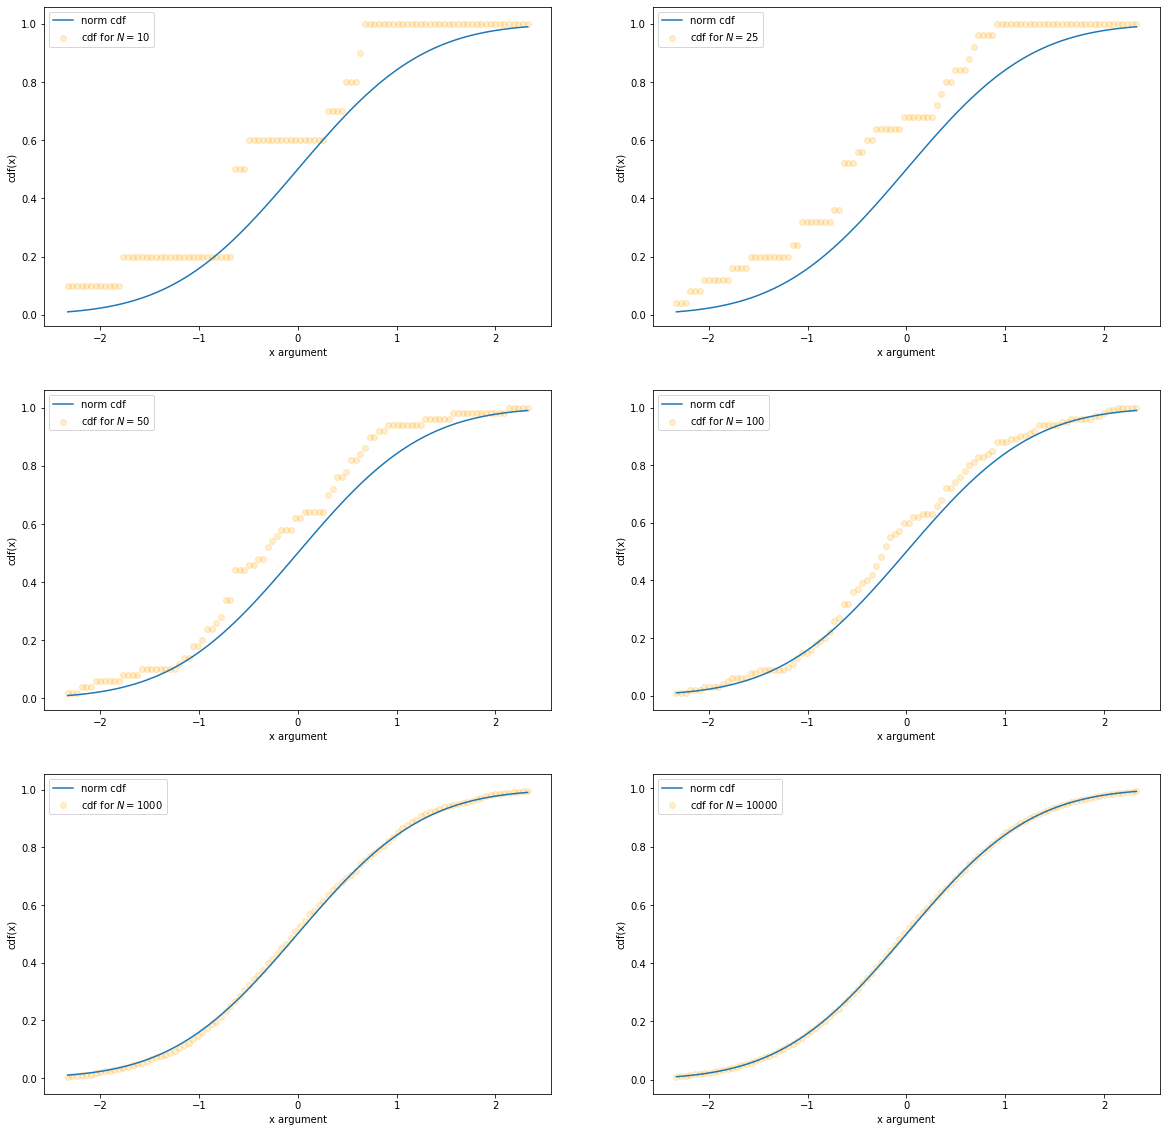

In [491]:
from statsmodels.distributions.empirical_distribution import ECDF

cdfs = [ECDF(selection[:i]) for i in range(1, N + 1)]
ns = [10, 25, 50, 100, 1000, N]

plt.figure(figsize=(20, 20))
count = 1
for i in ns:
    y = [cdfs[i - 1](point) for point in x]
    plt.subplot(3, 2, count)
    count+=1
    plt.scatter(x, y, alpha=0.2, color="orange", label="cdf for $N = {}$".format(i))
    plt.plot(x, rv.cdf(x), label="norm cdf")
    plt.xlabel('x argument')
    plt.ylabel('cdf(x)')
    plt.legend()

plt.show()

Как можно заметить данные графики подтверждают теорему Гливенко — Кантелли.


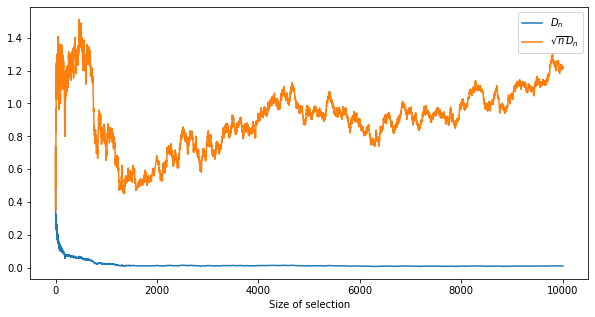

In [493]:
plt.figure(figsize=(10, 5))

Dn = [np.abs(cdfs[n](x) - rv.cdf(x)).max() for n in range(N)]
sqrtDn = [np.sqrt(i + 1) * Dn[i] for i in range(N)]
plt.plot(range(1, N + 1), Dn, label='${D}_n$')
plt.plot(range(1, N + 1), sqrtDn, label='${\sqrt{n}D}_n$')
plt.xlabel('Size of selection')
plt.legend()
plt.show()

Благодаря этому графику видно, что 'условия' теоремы Гливенко — Кантелли достаточно сильны. Потому что $D_n$ как раз является 'условием' данной теоремы, а при домножении $D_n$ на $\sqrt{n}$ уже теряется сходимость почти наверное.